In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [ ]:
'''
lets see IF WE CAN SAMPLE SOME DISCZ
'''
%time
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
from graphlearn.discsampler import discsampler
disc = discsampler()
# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=50
pos = itertools.islice(training_graphs,training_size)
pos,pos2 = itertools.tee(pos)
training_graphs2 = gspan_to_eden( 'bursi.neg.gspan' )
neg = itertools.islice(training_graphs,training_size)
gr=disc.sample_graphs(pos,neg, radius=.5, how_many= 100, check_k=30)
draw_graph_set(gr)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.9 µs
got estimeetaaa
got grammar
got forest
got heap
got dist
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or derived from BaseException, not str
exceptions must be old-style classes or der

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


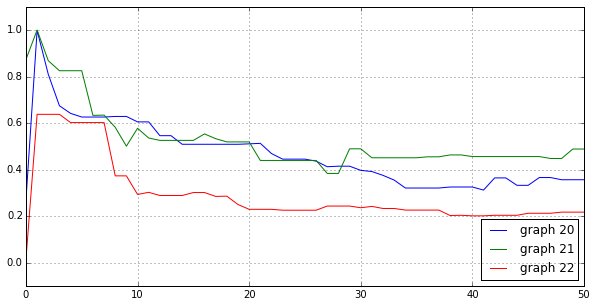

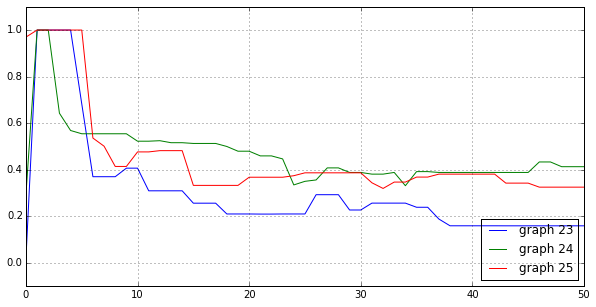

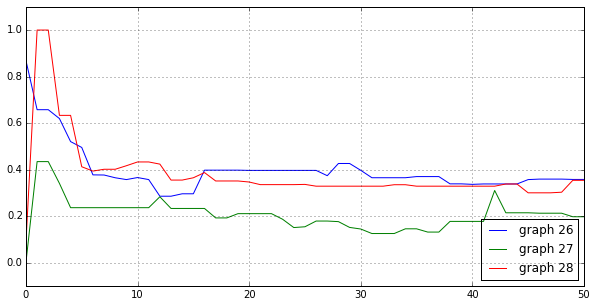

In [15]:
'''
lets see how the distance is developing  while doing the improvement thing
ok distance is just useless oOo
'''
%time
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
from eden.modifier.graph.vertex_attributes import colorize 
from sklearn.metrics.pairwise import euclidean_distances as dist
#from sklearn.metrics.pairwise import linear_kernel as dist
#from sklearn.metrics.pairwise import cosine_distances as dist
class show_distance(gl.GraphLearnSampler):
    # stop score tracking:
    def _score_list_append(self,graph):
        pass
    #hijack stop condition to save different values
    def _stop_condition(self,graph):
        
        if self.step == 0:
            self.vectorizer._reference_vec = self.vectorizer.transform_single(graph)
        else:    
            x = self.vectorizer.transform_single(graph)
            
            similarity = self.vectorizer._reference_vec.dot(x.T).todense()[0,0]
            #similarity= dist(x, self.vectorizer._reference_vec)
            self._score_list.append(similarity)
            #print similarity

            
            
            
# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=50
training_graphs = itertools.islice(training_graphs,training_size)
sampler=show_distance(radius_list=[1,2],thickness_list=[1,2])
#sampler.fit(training_graphs,n_jobs=-1, core_interface_pair_remove_threshold=2, interface_remove_threshold=2)
#sampler.save('tmp/demo.ge')            
                         
#sampler=show_distance()
#sampler=gl.GraphLearnSampler()
sampler.load('tmp/demo.ge')

graphs = gspan_to_eden( 'bursi.pos.gspan' )

id_start=20
id_end=id_start+9

graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50
sampling_interval=int(n_steps/5)+1
graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=True,
                        sampling_interval=sampling_interval,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        annealing_factor=.5,
                        probabilistic_core_choice=True,
                        burnout=1,
                        select_cip_max_tries=100)

  
scores=[]
for graph in list(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])

from itertools import islice
import numpy as np

step=sampling_interval
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()    
    

In [23]:
import numpy as np 
from itertools import izip
a = np.arange(6).reshape(2,3)
print a

for x,y in izip(range(3),iter(a)):#np.nditer(a, flags=['external_loop'], order='C'):
     print x,y

[[0 1 2]
 [3 4 5]]
0 [0 1 2]
1 [3 4 5]


In [5]:
class Base(object):
    def __init__(self):
        print "Base created"

class ChildA(Base):
    def __init__(self):
        Base.__init__(self)

class ChildB(Base):
    def __init__(self):
        super(ChildB, self).__init__()

ChildA() 
ChildB()

Base created
Base created
